In [1]:
import pandas as pd

x_train_df = pd.read_csv('x_train_all.csv')
y_train_df = pd.read_csv('y_train_all.csv')

merged_df = pd.concat([x_train_df, y_train_df], axis=1)

merged_df.to_csv('merged_train_data.csv', index=False)


In [2]:
import pandas as pd

merged_data = pd.read_csv('merged_train_data.csv')

In [3]:
merged_data=merged_data.rename(columns={'0.1':'label'})

In [4]:
merged_data.head()


,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0,0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0,0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0,0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0,0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0,0


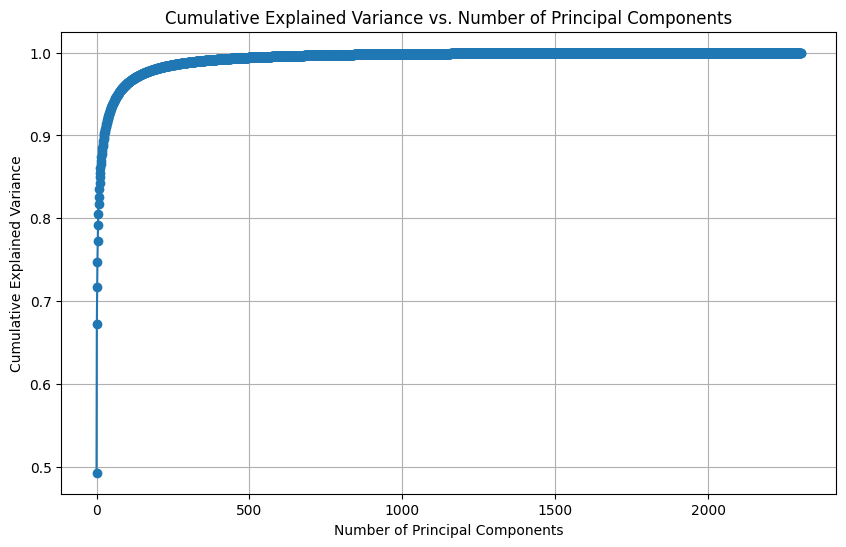

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = merged_data
X = df.drop('label', axis=1) 
y = df['label'] 

pca = PCA()
X_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()


In [25]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

printmd("# <center> Feature selection for each class 5,10,20 features<center>")

# <center> Feature selection for each class 5,10,20 features<center>

In [6]:
import pandas as pd
import numpy as np

df= merged_data

target_column = 'label'
features = df.drop(target_column, axis=1)
target = df[target_column]


mean_pixel_values_per_class = features.groupby(target).mean()

top_5_features = {}
for class_label in range(10): 
    top_5_features[class_label] = mean_pixel_values_per_class.loc[class_label].nlargest(5).index

df_top_5_features = pd.DataFrame(top_5_features)
df_top_5_features = df_top_5_features.T
df_top_5_features.columns = [f"{i+1}" for i in range(5)]
print(df_top_5_features)


      1     2     3     4     5
0   793   792   840  1657   791
1  1609   792  1608  1657   840
2  1609  1608  1610  1561  1607
3     0     1    48     2     3
4  1560  1512  1561  1559  1511
5  1509  1508  1460  1510  1556
6  1516  1515  1468  1517  1514
7  1506  1554  1507  1601  1602
8  1126   984  1078   936   983
9  1079  1032  1080  1031   984


In [7]:
import pandas as pd
import numpy as np


df = merged_data

target_column = 'label'
features = df.drop(target_column, axis=1)
target = df[target_column]


mean_pixel = features.groupby(target).mean()

top_10_features_per_class = {}
for class_label in range(10):  
    top_10_features_per_class[class_label] = mean_pixel.loc[class_label].nlargest(10).index

df_top_10_features = pd.DataFrame(top_10_features_per_class)
df_top_10_features = df_top_10_features.T
df_top_10_features.columns = [f"{i+1}" for i in range(10)]
print(df_top_10_features)


      1     2     3     4     5     6     7     8     9    10
0   793   792   840  1657   791   745  1168  1656   744  1169
1  1609   792  1608  1657   840  1656   793   791  1658  1655
2  1609  1608  1610  1561  1607  1611  1560  1562  1657  1656
3     0     1    48     2     3     4     5    96    49    50
4  1560  1512  1561  1559  1511  1464  1609  1608  1217  1218
5  1509  1508  1460  1510  1556  1557  1507  1558  1461  1459
6  1516  1515  1468  1517  1514  1563  1564  1467  1469  1565
7  1506  1554  1507  1601  1602  1459  1458  1553  1649  1555
8  1126   984  1078   936   983  1174  1031   985  1125  1173
9  1079  1032  1080  1031   984  1128  1127  1081  1033   983


In [8]:
import pandas as pd
import numpy as np


target_column = 'label'
features = df.drop(target_column, axis=1)
target = df[target_column]


mean_pixel = features.groupby(target).mean()


top_20_features = {}
for class_label in range(10):  
    top_20_features[class_label] = mean_pixel.loc[class_label].nlargest(20).index

df_top_20_features = pd.DataFrame(top_20_features)
df_top_20_features = df_top_20_features.T
df_top_20_features.columns = [f"{i+1}" for i in range(20)]
print(df_top_20_features)


      1     2     3     4     5     6     7     8     9    10    11    12  \
0   793   792   840  1657   791   745  1168  1656   744  1169   841   746   
1  1609   792  1608  1657   840  1656   793   791  1658  1655  1264  1610   
2  1609  1608  1610  1561  1607  1611  1560  1562  1657  1656   841  1658   
3     0     1    48     2     3     4     5    96    49    50    45    51   
4  1560  1512  1561  1559  1511  1464  1609  1608  1217  1218  1170  1463   
5  1509  1508  1460  1510  1556  1557  1507  1558  1461  1459  1555  1511   
6  1516  1515  1468  1517  1514  1563  1564  1467  1469  1565  1562  1466   
7  1506  1554  1507  1601  1602  1459  1458  1553  1649  1555  1650  1505   
8  1126   984  1078   936   983  1174  1031   985  1125  1173  1030  1471   
9  1079  1032  1080  1031   984  1128  1127  1081  1033   983  1078  1129   

     13    14    15    16    17    18    19    20  
0  1658  1216  1121   743   794  1655  1120  1610  
1  1607   839  1265  1313  1216  1560  1561  131

In [9]:
import pandas as pd

merged_data_processed = pd.read_csv('processed_df.csv')

In [10]:
merged_data_processed = merged_data_processed.drop(merged_data_processed.columns[0], axis=1)

merged_data_processed.to_csv("processed_df.csv")


In [11]:
merged_data_processed=pd.concat([merged_data_processed,y_train_df],axis=1)
merged_data_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,0
0,78,71,71,113,125,125,-114,-81,-104,-100,...,-121,83,104,124,-93,-74,-86,-107,-107,0
1,120,-114,-93,-100,-124,111,-122,-86,-36,-51,...,-114,120,90,53,80,-120,-58,-51,-51,0
2,85,106,120,113,118,-128,-100,-100,77,78,...,-114,124,102,78,73,104,-107,-72,-51,0
3,57,78,99,106,-116,-93,-96,116,29,113,...,120,109,99,100,87,88,113,-86,-58,0
4,99,99,92,85,106,123,-100,-93,77,57,...,113,-121,-95,-90,-110,-122,64,78,99,0


In [12]:
merged_data_processed= merged_data_processed.rename(columns={'0':'label'})

In [13]:
merged_data_processed.head()


,label,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
0,78,71,71,113,125,125,-114,-81,-104,-100,...,-121,83,104,124,-93,-74,-86,-107,-107,0
1,120,-114,-93,-100,-124,111,-122,-86,-36,-51,...,-114,120,90,53,80,-120,-58,-51,-51,0
2,85,106,120,113,118,-128,-100,-100,77,78,...,-114,124,102,78,73,104,-107,-72,-51,0
3,57,78,99,106,-116,-93,-96,116,29,113,...,120,109,99,100,87,88,113,-86,-58,0
4,99,99,92,85,106,123,-100,-93,77,57,...,113,-121,-95,-90,-110,-122,64,78,99,0


In [14]:
merged_data_processed.columns.values[0] = '0'

In [15]:
merged_data_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
0,78,71,71,113,125,125,-114,-81,-104,-100,...,-121,83,104,124,-93,-74,-86,-107,-107,0
1,120,-114,-93,-100,-124,111,-122,-86,-36,-51,...,-114,120,90,53,80,-120,-58,-51,-51,0
2,85,106,120,113,118,-128,-100,-100,77,78,...,-114,124,102,78,73,104,-107,-72,-51,0
3,57,78,99,106,-116,-93,-96,116,29,113,...,120,109,99,100,87,88,113,-86,-58,0
4,99,99,92,85,106,123,-100,-93,77,57,...,113,-121,-95,-90,-110,-122,64,78,99,0


In [24]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

printmd("# <center> Feature selection for each class 5,10,20 features (Processed data)<center>")

# <center> Feature selection for each class 5,10,20 features (Processed data)<center>

In [16]:
import pandas as pd
import numpy as np

df= merged_data_processed

target_column = 'label'
features = df.drop(target_column, axis=1)
target = df[target_column]


mean_pixel_values_per_class = features.groupby(target).mean()

top_5_features = {}
for class_label in range(10): 
    top_5_features[class_label] = mean_pixel_values_per_class.loc[class_label].nlargest(5).index

df_top_5_features = pd.DataFrame(top_5_features)
df_top_5_features = df_top_5_features.T
df_top_5_features.columns = [f"{i+1}" for i in range(5)]
print(df_top_5_features)


      1     2     3     4     5
0  1419  1371  1478   982  1130
1  1900  1715  1668  1714  1808
2  1854  1714  1808  1807  1853
3  1172  1171  1221  1222  1226
4  2006  2050  2005  1960  2008
5  1433  1578  1481  1529  1530
6  1282  1379  1233  1330  1331
7   996   995  1224   948   947
8  1378  1718  1281  1427  1670
9  1086   989  1432  1183  1419


In [17]:
import pandas as pd
import numpy as np


df = merged_data_processed

target_column = 'label'
features = df.drop(target_column, axis=1)
target = df[target_column]


mean_pixel = features.groupby(target).mean()

top_10_features_per_class = {}
for class_label in range(10):  
    top_10_features_per_class[class_label] = mean_pixel.loc[class_label].nlargest(10).index

df_top_10_features = pd.DataFrame(top_10_features_per_class)
df_top_10_features = df_top_10_features.T
df_top_10_features.columns = [f"{i+1}" for i in range(10)]
print(df_top_10_features)


      1     2     3     4     5     6     7     8     9    10
0  1419  1371  1478   982  1130  1668  1239  1430  1287  1095
1  1900  1715  1668  1714  1808  1573  1762  1620  1667  1854
2  1854  1714  1808  1807  1853  1855  1761  1667  1762  1898
3  1172  1171  1221  1222  1226  1714  1419  1123  1715  1468
4  2006  2050  2005  1960  2008  1912  2053  2051  2007  1958
5  1433  1578  1481  1529  1530  1432  1287  1572  1330  1378
6  1282  1379  1233  1330  1331  1428  1427  1281  1234  1184
7   996   995  1224   948   947  1862   899  1814   989  1238
8  1378  1718  1281  1427  1670  1330  1524  1184  1621  1766
9  1086   989  1432  1183  1419  1232  1413  1329  1370  1384


In [18]:
import pandas as pd
import numpy as np

df = merged_data_processed
target_column = 'label'
features = df.drop(target_column, axis=1)
target = df[target_column]


mean_pixel = features.groupby(target).mean()


top_20_features = {}
for class_label in range(10):  
    top_20_features[class_label] = mean_pixel.loc[class_label].nlargest(20).index

df_top_20_features = pd.DataFrame(top_20_features)
df_top_20_features = df_top_20_features.T
df_top_20_features.columns = [f"{i+1}" for i in range(20)]
print(df_top_20_features)


      1     2     3     4     5     6     7     8     9    10    11    12  \
0  1419  1371  1478   982  1130  1668  1239  1430  1287  1095  1762  1715   
1  1900  1715  1668  1714  1808  1573  1762  1620  1667  1854  1855  1761   
2  1854  1714  1808  1807  1853  1855  1761  1667  1762  1898  1715  1900   
3  1172  1171  1221  1222  1226  1714  1419  1123  1715  1468  1173  1322   
4  2006  2050  2005  1960  2008  1912  2053  2051  2007  1958  1865  2004   
5  1433  1578  1481  1529  1530  1432  1287  1572  1330  1378  1475  1626   
6  1282  1379  1233  1330  1331  1428  1427  1281  1234  1184  1380  1136   
7   996   995  1224   948   947  1862   899  1814   989  1238  1272  1086   
8  1378  1718  1281  1427  1670  1330  1524  1184  1621  1766  1232  1475   
9  1086   989  1432  1183  1419  1232  1413  1329  1370  1384   940  1481   

     13    14    15    16    17    18    19    20  
0   934  1178  1335  1667  1573  1082   933  1621  
1  1946  1809  1901  1947  1945  1478  1383  189

In [23]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

printmd("# <center> PCA for each class 5,10,20 principal components features<center>")

# <center> PCA for each class 5,10,20 principal components features<center>

In [20]:
import pandas as pd
from sklearn.decomposition import PCA

class_data = {}
for class_label in range(10):
    class_data[class_label] = merged_data[merged_data['label'] == class_label]

pca_results = []
n_components = 5 

for class_label, class_df in class_data.items():
    features = class_df.drop('label', axis=1)
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(features)
    df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_results.append(df_pca)

pca5combined = pd.concat(pca_results, ignore_index=True)

print("PCA5 DataFrame:")
print(pca5combined)
# pca5combined.to_csv('pca5combined.csv', index=False)


PCA5 DataFrame:
              PC1          PC2         PC3          PC4         PC5
0     -506.091665  -498.194812 -321.373553  1222.371717  644.404704
1     -514.810636  -570.820730 -224.547850  1321.360898  652.494621
2     -595.796798  -588.322169 -215.225124  1319.837783  548.353660
3     -673.047164  -545.728845 -190.006485  1237.126137  510.344537
4     -381.844144  -561.482624 -334.014336  1157.460434  617.398476
...           ...          ...         ...          ...         ...
9685  1121.708467 -2428.890391  484.758618   150.528653  -10.197014
9686  1198.447662 -2312.982815   42.814674   -21.365992  283.149815
9687  1129.030359 -2474.780700  374.007841  -528.172406   89.442447
9688  1452.874537 -2772.090401   42.901680   -67.183500  268.374941
9689   792.467548 -2103.626022 -584.826533   321.736192  501.669496

[9690 rows x 5 columns]


In [21]:
import pandas as pd
from sklearn.decomposition import PCA

class_data = {}
for class_label in range(10):
    class_data[class_label] = merged_data[merged_data['label'] == class_label]

pca_results = []
n_components = 10 

for class_label, class_df in class_data.items():
    features = class_df.drop('label', axis=1)
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(features)
    df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_results.append(df_pca)

pca10combined = pd.concat(pca_results, ignore_index=True)

print("PCA10 DataFrame:")
print(pca10combined)
# pca5combined.to_csv('pca10combined.csv', index=False)


PCA10 DataFrame:
              PC1          PC2         PC3          PC4         PC5  \
0     -506.091665  -498.194812 -321.373554  1222.371709  644.404370   
1     -514.810636  -570.820730 -224.547851  1321.360890  652.494124   
2     -595.796798  -588.322169 -215.225125  1319.837777  548.353285   
3     -673.047164  -545.728846 -190.006485  1237.126132  510.344316   
4     -381.844144  -561.482624 -334.014337  1157.460431  617.398030   
...           ...          ...         ...          ...         ...   
9685  1121.708467 -2428.890391  484.758621   150.528662  -10.205587   
9686  1198.447662 -2312.982815   42.814677   -21.365992  283.146060   
9687  1129.030359 -2474.780700  374.007852  -528.172422   89.437431   
9688  1452.874537 -2772.090401   42.901683   -67.183484  268.362100   
9689   792.467548 -2103.626022 -584.826522   321.736198  501.645138   

             PC6         PC7         PC8         PC9        PC10  
0    -503.341953  -23.581939  124.796373 -572.151751  -78.86402

In [26]:
import pandas as pd
from sklearn.decomposition import PCA

class_data = {}
for class_label in range(10):
    class_data[class_label] = merged_data[merged_data['label'] == class_label]

pca_results = []
n_components = 20 

for class_label, class_df in class_data.items():
    features = class_df.drop('label', axis=1)
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(features)
    df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_results.append(df_pca)

pca20combined = pd.concat(pca_results, ignore_index=True)

print("PCA20 DataFrame:")
print(pca20combined)
# pca5combined.to_csv('pca20combined.csv', index=False)


PCA20 DataFrame:
              PC1          PC2         PC3          PC4         PC5  \
0     -506.091665  -498.194812 -321.373554  1222.371710  644.404375   
1     -514.810636  -570.820730 -224.547851  1321.360890  652.494128   
2     -595.796798  -588.322169 -215.225125  1319.837778  548.353282   
3     -673.047164  -545.728846 -190.006485  1237.126133  510.344306   
4     -381.844144  -561.482624 -334.014337  1157.460430  617.398039   
...           ...          ...         ...          ...         ...   
9685  1121.708467 -2428.890391  484.758621   150.528661  -10.206186   
9686  1198.447662 -2312.982815   42.814677   -21.365992  283.145136   
9687  1129.030359 -2474.780700  374.007852  -528.172423   89.435992   
9688  1452.874537 -2772.090401   42.901683   -67.183484  268.360670   
9689   792.467548 -2103.626022 -584.826522   321.736200  501.645789   

             PC6         PC7         PC8         PC9        PC10        PC11  \
0    -503.341696  -23.581338  124.792893 -572.1189

In [27]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

printmd("# <center> PCA for each class 5,10,20 principal components features (processed data)<center>")

# <center> PCA for each class 5,10,20 principal components features (processed data)<center>

In [28]:
import pandas as pd
from sklearn.decomposition import PCA

class_data = {}
for class_label in range(10):
    class_data[class_label] = merged_data_processed[merged_data_processed['label'] == class_label]

pca_results = []
n_components = 5 

for class_label, class_df in class_data.items():
    features = class_df.drop('label', axis=1)
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(features)
    df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_results.append(df_pca)

pca5combinedpro = pd.concat(pca_results, ignore_index=True)

print("PCA5 DataFrame:")
print(pca5combinedpro)
# pca5combined.to_csv('pca5combined.csv', index=False)


PCA5 DataFrame:
              PC1         PC2          PC3         PC4         PC5
0      317.616592 -426.537548   619.686827 -189.151901  223.734510
1      657.833062 -601.679733  1246.043740   63.804671   89.202541
2      943.937625 -910.147012  1415.461573  -47.301456  267.044482
3      694.842287 -613.856651  1397.152315 -430.558768  439.139999
4      474.898254 -661.583361   674.203629 -167.407689 -260.811269
...           ...         ...          ...         ...         ...
9685  -848.788405 -560.652765   -98.103976  -17.278686  464.354683
9686  -915.577766 -474.762678    46.894248  -42.064389  529.078096
9687  -927.796093 -545.341365  -177.187023    3.757016  542.044261
9688 -1004.865287 -416.045475  -101.707253  -73.271500  574.650728
9689  -864.189749 -502.093082  -109.205595 -202.410459  592.225964

[9690 rows x 5 columns]


In [29]:
import pandas as pd
from sklearn.decomposition import PCA

class_data = {}
for class_label in range(10):
    class_data[class_label] = merged_data_processed[merged_data_processed['label'] == class_label]

pca_results = []
n_components = 10 

for class_label, class_df in class_data.items():
    features = class_df.drop('label', axis=1)
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(features)
    df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_results.append(df_pca)

pca10combinedpro = pd.concat(pca_results, ignore_index=True)

print("PCA10 DataFrame:")
print(pca10combinedpro)
# pca5combined.to_csv('pca10combined.csv', index=False)


PCA10 DataFrame:
              PC1         PC2          PC3         PC4         PC5  \
0      317.616597 -426.538356   619.710558 -189.199498  223.166186   
1      657.833071 -601.677598  1246.087824   64.150566   89.697473   
2      943.937625 -910.143260  1415.543930  -46.695117  268.043771   
3      694.842290 -613.854541  1397.204683 -429.823494  439.634150   
4      474.898269 -661.583376   674.201116 -167.502456 -261.244193   
...           ...         ...          ...         ...         ...   
9685  -848.788371 -560.700749   -97.991729  -17.253891  464.692799   
9686  -915.577745 -474.837221    47.044177  -42.030738  529.598951   
9687  -927.796056 -545.421072  -177.033320    3.748542  542.551724   
9688 -1004.865259 -416.120846  -101.659157  -73.455255  574.530171   
9689  -864.189716 -502.155692  -109.090922 -202.390307  592.784586   

             PC6         PC7         PC8          PC9        PC10  
0     799.675706 -115.392281  468.771583  -976.670399  408.493100  
1     

In [30]:
import pandas as pd
from sklearn.decomposition import PCA

class_data = {}
for class_label in range(10):
    class_data[class_label] = merged_data_processed[merged_data_processed['label'] == class_label]

pca_results = []
n_components = 20 

for class_label, class_df in class_data.items():
    features = class_df.drop('label', axis=1)
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(features)
    df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_results.append(df_pca)

pca20combinedpro = pd.concat(pca_results, ignore_index=True)

print("PCA20 DataFrame:")
print(pca20combinedpro)
# pca5combined.to_csv('pca20combined.csv', index=False)


PCA20 DataFrame:
              PC1         PC2          PC3         PC4         PC5  \
0      317.616604 -426.538315   619.708119 -189.335337  223.291887   
1      657.833074 -601.677994  1246.083995   64.035719   89.459688   
2      943.937629 -910.143388  1415.542520  -46.739789  267.922207   
3      694.842275 -613.854515  1397.206356 -429.942394  440.184383   
4      474.898266 -661.583577   674.199091 -167.618368 -261.059617   
...           ...         ...          ...         ...         ...   
9685  -848.788367 -560.710683   -97.981389  -17.229020  464.622017   
9686  -915.577744 -474.852093    47.037866  -42.008531  529.436994   
9687  -927.796049 -545.436189  -177.023788    3.783958  542.408617   
9688 -1004.865254 -416.132804  -101.632596  -73.409970  574.440182   
9689  -864.189710 -502.175993  -109.078258 -202.377832  592.734620   

             PC6         PC7         PC8          PC9        PC10        PC11  \
0     798.872793 -116.847978  464.502178  -975.166636  393.27

In [32]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

printmd("# <center> Function PCA for each class n principal components features <center>")

# <center> Function PCA for each class n principal components features <center>

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

def pcadata(merged_data,n_comp):
    class_data = {}
    for class_label in range(10):
        class_data[class_label] = merged_data[merged_data['label'] == class_label]

    pca_results = []
    n_components = n_comp 

    for class_label, class_df in class_data.items():
        features = class_df.drop('label', axis=1)
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(features)
        df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
        pca_results.append(df_pca)

    pcacombined = pd.concat(pca_results, ignore_index=True)

    return pcacombined
    #print("PCA DataFrame:")
    #print(pcacombined)
    # pca5combined.to_csv('pcacombined.csv', index=False)


In [45]:
import pandas as pd
from sklearn.decomposition import PCA

def pcadata(X_train ,Y_train, n_comp):

    merged_data = pd.concat([X_train, Y_train], axis=1)
    merged_data.columns.values[-1] = 'label'
    class_data = {}
    for class_label in range(10):
        class_data[class_label] = merged_data[merged_data['label'] == class_label]

    pca_results = []
    n_components = n_comp 

    for class_label, class_df in class_data.items():
        features = class_df.drop('label', axis=1)
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(features)
        df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
        pca_results.append(df_pca)

    pcacombined = pd.concat(pca_results, ignore_index=True)

    return pcacombined
    #print("PCA DataFrame:")
    #print(pcacombined)
    # pca5combined.to_csv('pcacombined.csv', index=False)


In [46]:
pcadata(x_train_df,y_train_df,5)

,PC1,PC2,PC3,PC4,PC5
0,-506.091665,-498.194812,-321.373553,1222.371720,644.404622
1,-514.810636,-570.820730,-224.547851,1321.360907,652.494542
2,-595.796798,-588.322169,-215.225124,1319.837784,548.353512
3,-673.047164,-545.728846,-190.006485,1237.126119,510.344188
4,-381.844144,-561.482624,-334.014337,1157.460463,617.398722
...,...,...,...,...,...
9685,1121.708467,-2428.890391,484.758621,150.528704,-10.181568
9686,1198.447662,-2312.982815,42.814649,-21.365847,283.192563
9687,1129.030359,-2474.780700,374.007804,-528.172278,89.460076
9688,1452.874537,-2772.090401,42.901685,-67.183414,268.409500
